In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
from sklearn.linear_model import LogisticRegression


SVM:
Accuracy: 0.9649
Sensitivity: 0.9062
Specificity: 1.0000
F1-Score: 0.9508
Confusion Matrix:
[[107   0]
 [  6  58]]

Logistic Regression:
Accuracy: 0.9708
Sensitivity: 0.9375
Specificity: 0.9907
F1-Score: 0.9600
Confusion Matrix:
[[106   1]
 [  4  60]]

SVM + LDA:
Accuracy: 0.9883
Sensitivity: 0.9688
Specificity: 1.0000
F1-Score: 0.9841
Confusion Matrix:
[[107   0]
 [  2  62]]


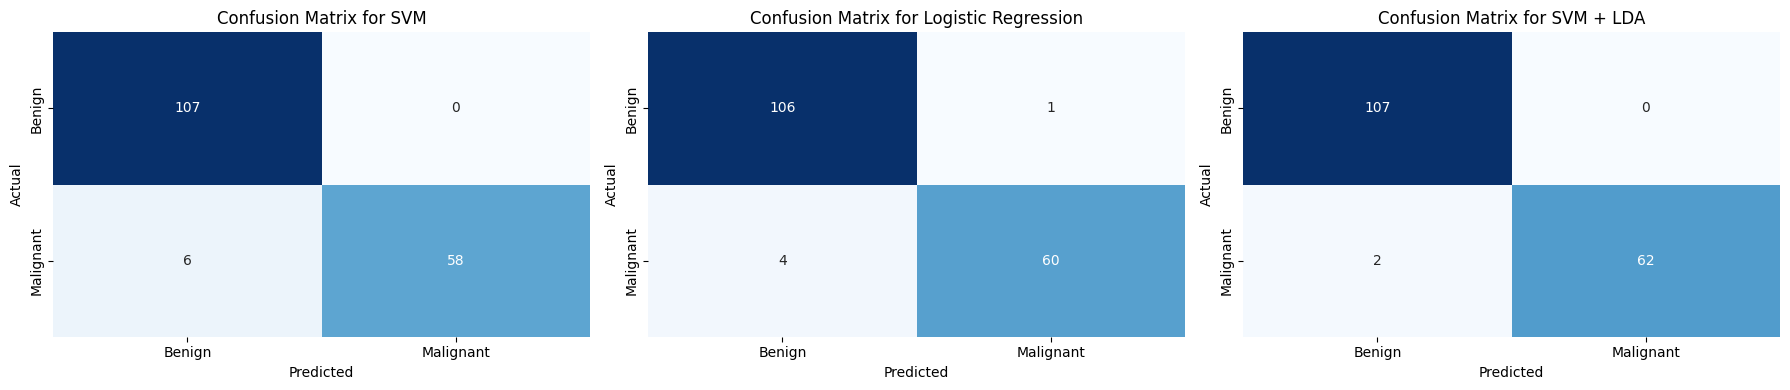

(0.9, 1.01)

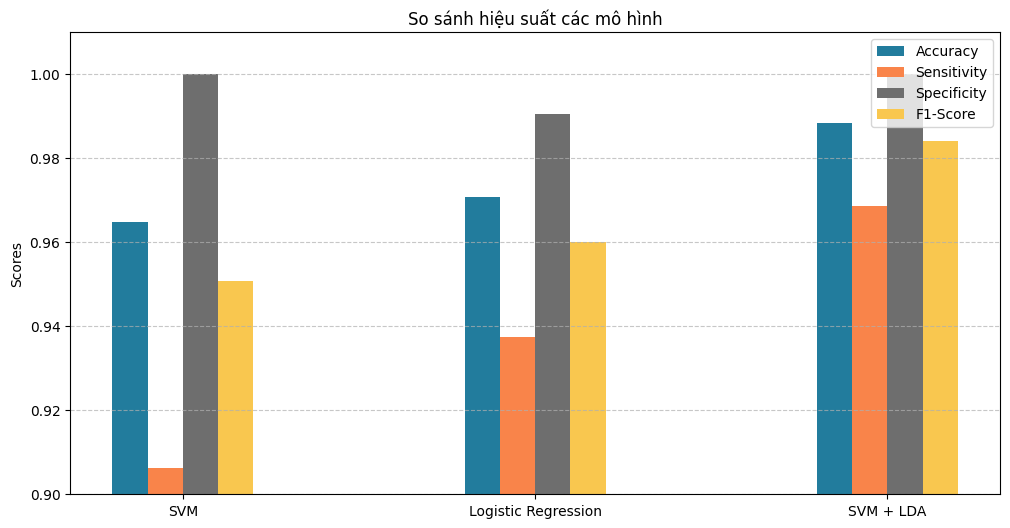

In [3]:
# Đọc dữ liệu
data = pd.read_csv('data/Dataset_Cancer.csv')
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Tách đặc trưng và nhãn
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lưu trữ kết quả
results = {}

# 1. SVM
svm_model = SVC(kernel='linear',probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Sensitivity': recall_score(y_test, y_pred_svm),
    'Specificity': tn / (tn + fp),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'Confusion Matrix': cm_svm
}

# 2. Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train_scaled, y_train)
y_pred_lda = lg_model.predict(X_test_scaled)
cm_lg = confusion_matrix(y_test, y_pred_lda)
tn, fp, fn, tp = cm_lg.ravel()
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lda),
    'Sensitivity': recall_score(y_test, y_pred_lda),
    'Specificity': tn / (tn + fp),
    'F1-Score': f1_score(y_test, y_pred_lda),
    'Confusion Matrix': cm_lg
}

# 3. SVM + LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
svm_model = SVC(C=0.1, kernel='linear', gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train_lda, y_train)
y_pred_svm_lda = svm_model.predict(X_test_lda)
cm_svm_lda = confusion_matrix(y_test, y_pred_svm_lda)
tn, fp, fn, tp = cm_svm_lda.ravel()
results['SVM + LDA'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm_lda),
    'Sensitivity': recall_score(y_test, y_pred_svm_lda),
    'Specificity': tn / (tn + fp),
    'F1-Score': f1_score(y_test, y_pred_svm_lda),
    'Confusion Matrix': cm_svm_lda
}

# In kết quả
for model, metrics in results.items():
    print(f"\n{model}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Sensitivity: {metrics['Sensitivity']:.4f}")
    print(f"Specificity: {metrics['Specificity']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")


num_models = len(results)
fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 4))  # 1 hàng, n cột

# Nếu chỉ có 1 mô hình, axes không phải là mảng, nên cần xử lý riêng
if num_models == 1:
    axes = [axes]

for ax, (model, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
                cbar=False, ax=ax)  # <--- tắt colorbar ở đây
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix for {model}')

plt.tight_layout()
plt.show()


# Vẽ biểu đồ cột so sánh hiệu suất
models = list(results.keys())
accuracy = [results[model]['Accuracy'] for model in models]
precision = [results[model]['Sensitivity'] for model in models]
specificity = [results[model]['Specificity'] for model in models]
f1_score = [results[model]['F1-Score'] for model in models]

x = np.arange(len(models)) * 1.5
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='#227C9D')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Sensitivity', color='#F9844A')
rects3 = ax.bar(x + 0.5*width, specificity, width, label='Specificity', color='#6E6E6E')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score', color='#F9C74F')

ax.set_ylabel('Scores')
ax.set_title('So sánh hiệu suất các mô hình')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)  # Thêm lưới ngang
ax.legend()
ax.set_ylim(0.9, 1.01)

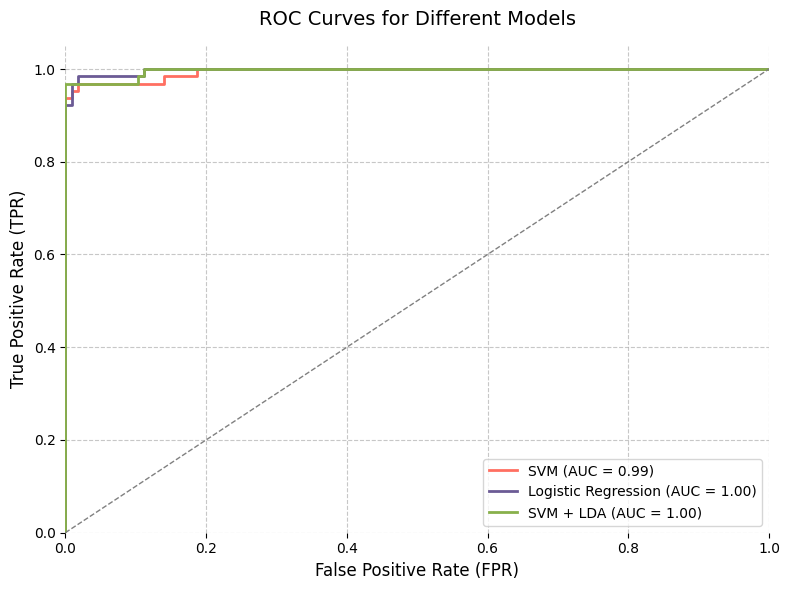

In [4]:


# Đọc dữ liệu
data = pd.read_csv('data/Dataset_Cancer.csv')
data = data.drop('id', axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Tách đặc trưng và nhãn
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SVM
svm_model = SVC(kernel='linear',probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_score_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 2. Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train_scaled, y_train)
y_score_lg = lg_model.predict_proba(X_test_scaled)[:, 1]
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)

# 3. SVM + LDA (Giữ nguyên như code của bạn)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
svm_model = SVC(C=0.1, kernel='linear', gamma='scale', random_state=42, probability=True)  # Thêm probability=True
svm_model.fit(X_train_lda, y_train)
y_score_svm_lda = svm_model.predict_proba(X_test_lda)[:, 1]  # Lấy xác suất cho lớp 1 (Malignant)
fpr_svm_lda, tpr_svm_lda, _ = roc_curve(y_test, y_score_svm_lda)
roc_auc_svm_lda = auc(fpr_svm_lda, tpr_svm_lda)

# Vẽ đường cong ROC cho cả 3 mô hình trên cùng 1 hình
plt.figure(figsize=(8, 6))

# Vẽ ROC cho SVM
plt.plot(fpr_svm, tpr_svm, color='#FF6F61', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Vẽ ROC cho Logistic Regression
plt.plot(fpr_lg, tpr_lg, color='#6B5B95', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')

# Vẽ ROC cho Proposed Model (SVM + LDA)
plt.plot(fpr_svm_lda, tpr_svm_lda, color='#88B04B', lw=2, label=f'SVM + LDA (AUC = {roc_auc_svm_lda:.2f})')

# Vẽ đường chéo (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Tùy chỉnh giao diện
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves for Different Models', fontsize=14, pad=15)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Tùy chỉnh viền
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [5]:
# Đọc dữ liệu trên tập dữ liệu mới
df = pd.read_csv('data/UCI_breast_cancer.csv')

# 1. Xử lý dữ liệu thiếu
df = df.dropna()

# 2. Tách X và y
X = df.drop(columns=['Sample_code_number', 'Class'])
y = df['Class'].replace({2.0: 0, 4.0: 1})  # Benign=0, Malignant=1

# 3. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# 6. SVM huấn luyện và đánh giá
svm_model = SVC(C=0.1, kernel='linear', gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train_lda, y_train)
y_pred_svm_lda = svm_model.predict(X_test_lda)

# 7. Tính các chỉ số
cm_svm_lda = confusion_matrix(y_test, y_pred_svm_lda)
tn, fp, fn, tp = cm_svm_lda.ravel()

# 8.Tính các chỉ số
cm = confusion_matrix(y_test, y_pred_svm_lda)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, y_pred_svm_lda)
sensitivity = recall_score(y_test, y_pred_svm_lda)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * precision * sensitivity / (precision + sensitivity)

# In kết quả
print("Kết quả mô hình SVM + LDA:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")


Kết quả mô hình SVM + LDA:
Accuracy: 0.9659
Sensitivity: 0.9722
Specificity: 0.9624
F1-Score: 0.9524
Confusion Matrix:
[[128   5]
 [  2  70]]


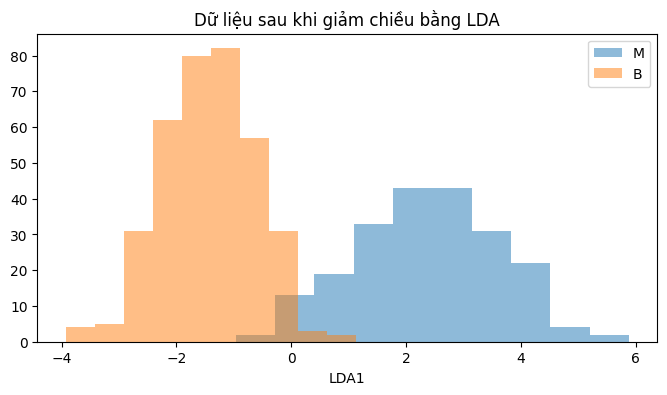

In [6]:
# Đọc dữ liệu
df = pd.read_csv('data/Dataset_Cancer.csv')

# Giả sử cột nhãn là 'diagnosis' và phần còn lại là đặc trưng
X = df.drop(columns=['diagnosis'])  # đặc trưng
y = df['diagnosis']                # nhãn

# Mã hóa nhãn thành số
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Malignant -> 1, Benign -> 0

# Dùng LDA để giảm còn 1 chiều (vì chỉ có 2 lớp)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y_encoded)

# Gắn kết quả vào DataFrame để dễ quan sát
df_lda = pd.DataFrame(X_lda, columns=['LDA1'])
df_lda['diagnosis'] = y.values

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
for label in df_lda['diagnosis'].unique():
    plt.hist(df_lda[df_lda['diagnosis'] == label]['LDA1'], label=label, alpha=0.5)
plt.title('Dữ liệu sau khi giảm chiều bằng LDA')
plt.xlabel('LDA1')
plt.legend()
plt.show()


              precision    recall  f1-score   support

           B       0.99      0.99      0.99       108
           M       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



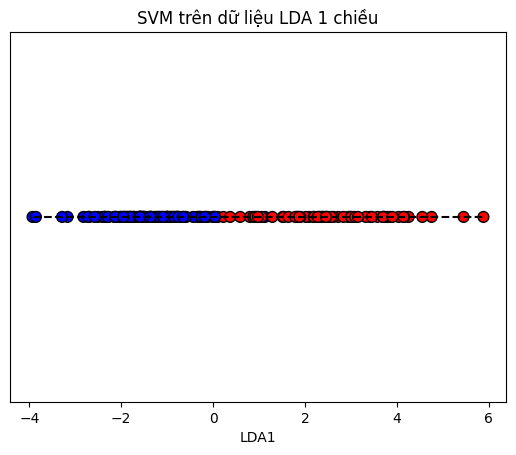

In [7]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_encoded, test_size=0.3, random_state=42)

# Huấn luyện SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Dự đoán
y_pred = svm.predict(X_test)

# Đánh giá
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Vẽ điểm dữ liệu
plt.scatter(X_test, [0]*len(X_test), c=y_test, cmap='bwr', edgecolor='k', s=60)

# Vẽ ngưỡng phân chia
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = svm.decision_function(x_line)
plt.plot(x_line, y_line*0, 'k--')  # Đường ngưỡng phân chia

plt.title("SVM trên dữ liệu LDA 1 chiều")
plt.xlabel("LDA1")
plt.yticks([])
plt.show()
